# Emotion Detection

In [57]:
import matplotlib.pyplot as plt
import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow Version : ",tf.__version__)

Tensorflow Version :  2.15.0


Exploring data set

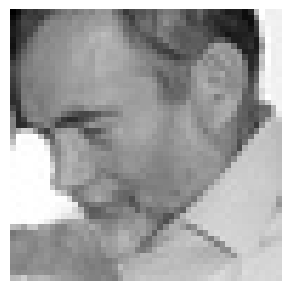

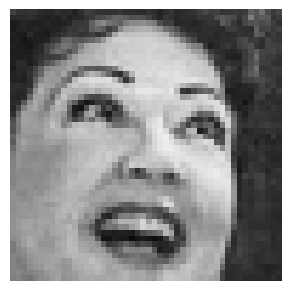

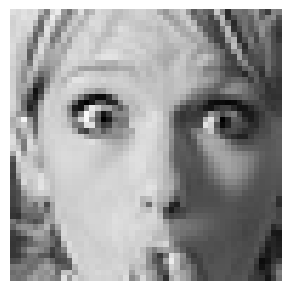

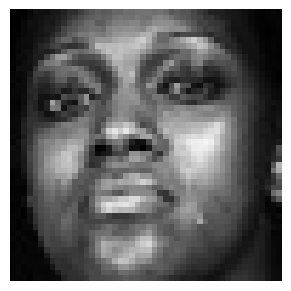

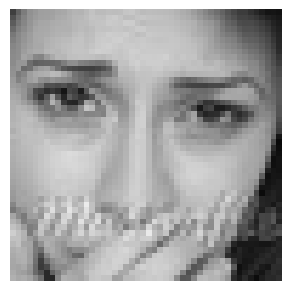

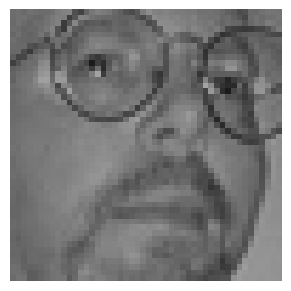

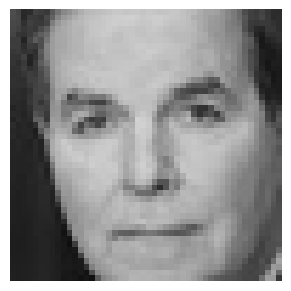

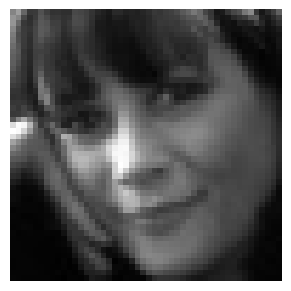

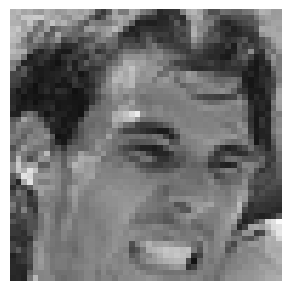

In [58]:
images=glob.glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [7]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)
datagen_validation=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode="grayscale",
                                                  batch_size=batch_size,
                                                 class_mode="categorical",
                                                 shuffle=True)


Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


Defining Model

In [8]:
def Convolution(input_tensor, filters, kernel_size):
    x=Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [9]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x

In [10]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [11]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0  

Initializing the Model

In [12]:
epochs = 5
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

Traning the Model

In [13]:
history=model.fit(x = train_generator,
                  steps_per_epoch = steps_per_epoch,
                  epochs = epochs,
                  validation_data = validation_generator,
                  validation_steps = validation_steps,
                  callbacks = callbacks)

Epoch 1/5


448/448 [==============================] - ETA: 0s - loss: 1.6753 - accuracy: 0.3633
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 699s 2s/step - loss: 1.6753 - accuracy: 0.3633 - val_loss: 1.4240 - val_accuracy: 0.4491
Epoch 2/5
448/448 [==============================] - ETA: 0s - loss: 1.3800 - accuracy: 0.4699
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 775s 2s/step - loss: 1.3800 - accuracy: 0.4699 - val_loss: 1.2857 - val_accuracy: 0.5113
Epoch 3/5
448/448 [==============================] - ETA: 0s - loss: 1.2679 - accuracy: 0.5170
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 191s 426ms/step - loss: 1.2679 - accuracy: 0.5170 - val_loss: 1.2106 - val_accuracy: 0.5307
Epoch 4/5
448/448 [==============================] - ETA: 0s - loss: 1.1943 - accuracy: 0.5495
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 190s 425

Model Evaluation

In [14]:
model.evaluate(validation_generator)

449/449 [==============================] - 1849s 4s/step - loss: 0.9957 - accuracy: 0.6292


[0.9956732988357544, 0.6292451620101929]

Plotting Loss

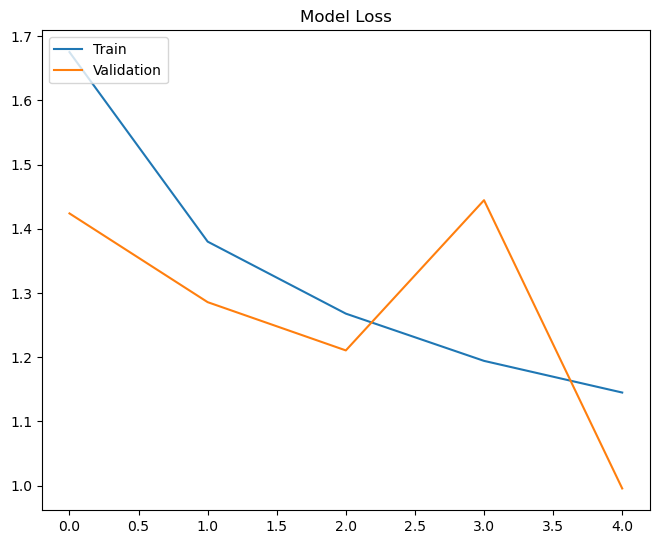

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

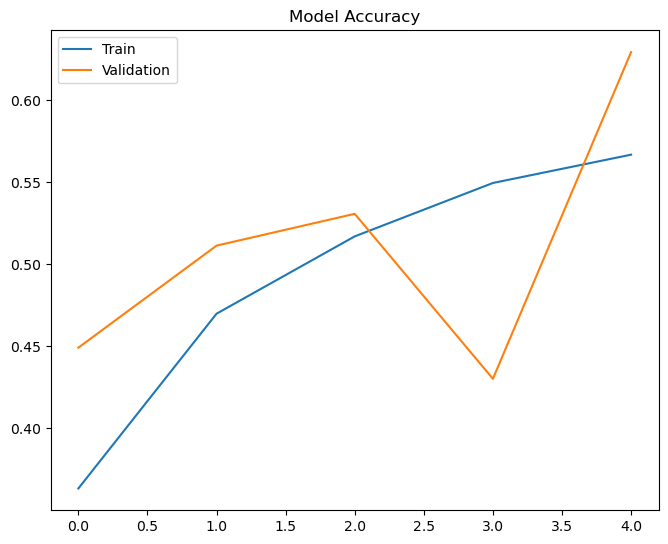

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)


Saving Model

In [22]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)